In [1]:
import utils as utils
import pickle
from model import ERecogClassifier

import os

import numpy as np
import torch.nn as nn
import torch.optim as optim

In [5]:
train_acc = np.load('results/train_accuracies.npy')
train_loss = np.load('results/train_loss.npy')
val_loss = np.load('results/train_val_loss.npy')
val_acc = np.load('results/train_val_acc.npy')

augment_train_acc = np.load('results/train_augment_accuracies.npy')
augment_train_loss = np.load('results/train_augment_loss.npy')
augment_val_acc = np.load('results/train_augment_val_acc.npy')
augment_val_loss = np.load('results/train_augment_val_loss.npy')

spec_train_acc = np.load('results/train_spec_augment_accuracies.npy')
spec_train_loss = np.load('results/train_spec_augment_loss.npy')
spec_val_acc = np.load('results/train_spec_augment_val_acc.npy')
spec_val_loss =  np.load('results/train_spec_augment_val_loss.npy')

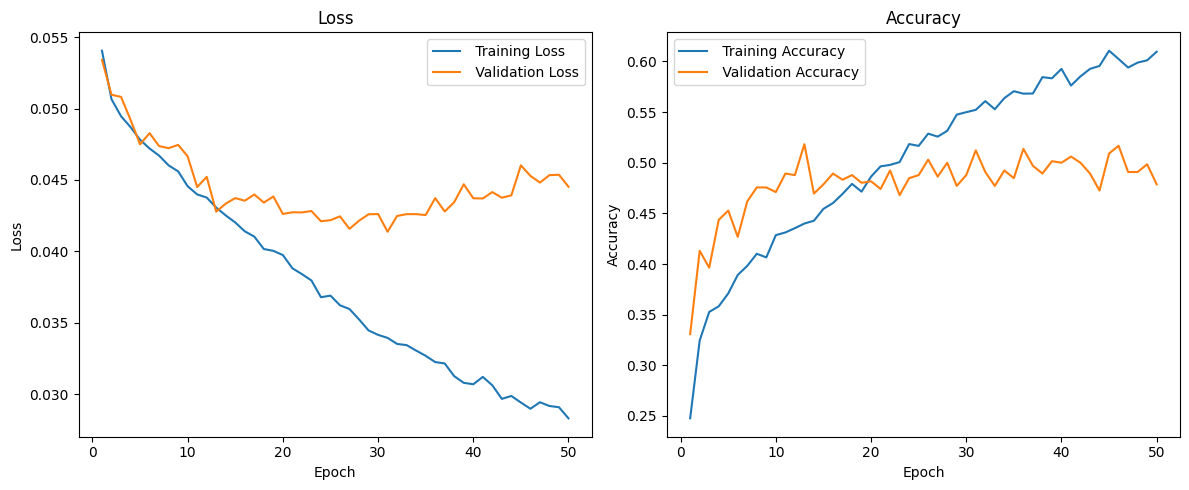

In [6]:
utils.plot_classification(train_loss,train_acc,val_loss,val_acc)

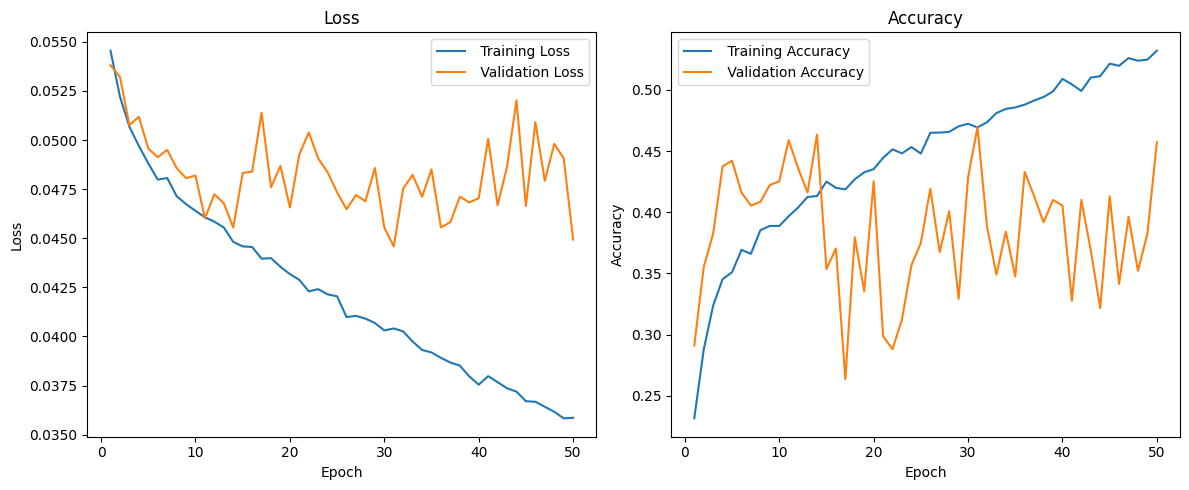

In [9]:
utils.plot_classification(augment_train_loss, augment_train_acc, augment_val_loss, augment_val_acc)

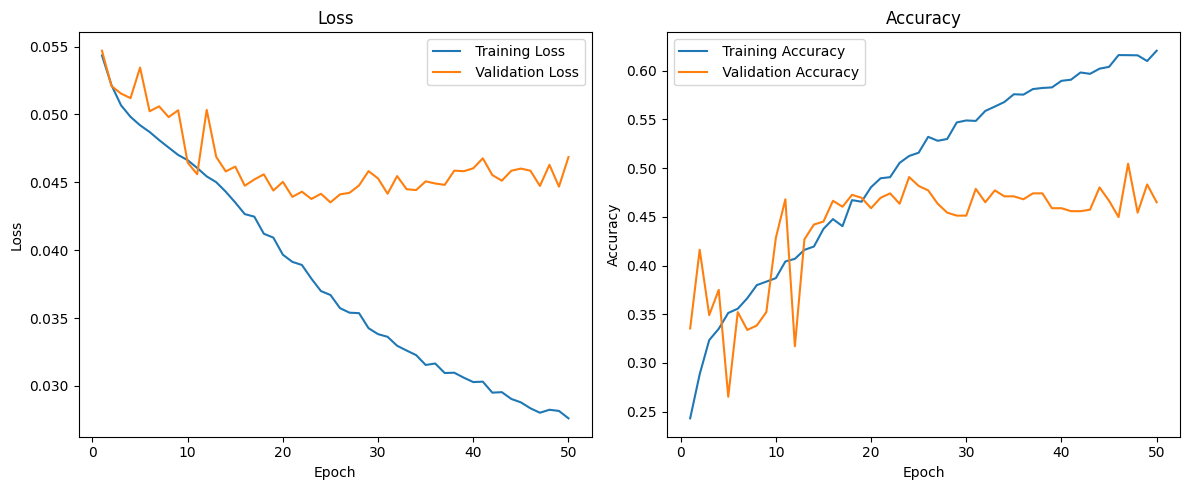

In [8]:
utils.plot_classification(spec_train_loss,spec_train_acc,spec_val_loss,spec_val_acc)

In [10]:
model = ERecogClassifier(num_classes=6)
optimizer = optim.Adam(model.parameters(), lr=5e-4)
num_epochs = 20
criterion = nn.CrossEntropyLoss()

train_loader = utils.create_data_loader(['../batches/train/','../batches/train_spec_augment/'], batch_size= 1, shuffle=True)
train_losses, train_accuracies, _, _ = utils.train_classification(model, criterion, optimizer, num_epochs, [train_loader], None)

Running loss: 1.7970519065856934
Running loss: 3.6923978328704834
Running loss: 5.5749794244766235
Running loss: 7.395204424858093
Running loss: 9.245546340942383
Running loss: 11.088554620742798
Running loss: 12.914423108100891
Running loss: 14.713022470474243
Running loss: 16.540690898895264
Running loss: 18.375500798225403
Running loss: 20.13634717464447
Running loss: 21.935720682144165
Running loss: 23.711700677871704
Running loss: 25.487984538078308
Running loss: 27.277535915374756
Running loss: 29.069560408592224
Running loss: 30.846186876296997
Running loss: 32.631958961486816
Running loss: 34.406843066215515
Running loss: 36.200719237327576
Running loss: 38.00631773471832
Running loss: 39.77968072891235
Running loss: 41.55982780456543
Running loss: 43.36677801609039
Running loss: 45.13458430767059
Running loss: 46.9333792924881
Running loss: 48.72314953804016
Running loss: 50.4994261264801
Running loss: 52.29390096664429
Running loss: 54.100292801856995
Running loss: 55.8746985

In [11]:
os.makedirs('final_model', exist_ok=True)
with open('final_model/final.model.pickle','wb') as model_file:
     pickle.dump(model, model_file)


np.save('results/final_train_loss', train_losses)
np.save('results/final_train_accuracies', train_accuracies)